# Steps

# 0. Preprocess + EDA + Feature Selection
# 1. Extract input and output cols
# 2. Scale the values
# 3. Train test split
# 4. Train the model
# 5. Evaluate the model/model selection
# 6. Deploy the model

#Uses Logistic Regression

In [151]:
import numpy as np
import pandas as pd

In [152]:
df= pd.read_csv('/content/placement.csv')

In [153]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [154]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [155]:
df.shape

(100, 4)

In [156]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


# **1**. **Preprocessing the datas**

In [157]:
#preprocessing the datas
df= df.iloc[:,1:] # i want all rows but columns only after the 1st column

In [158]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


## **2.** **EDA**

In [159]:
import matplotlib.pyplot as plt


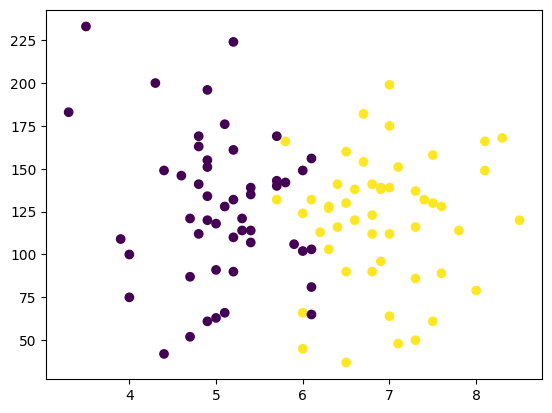

In [160]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

# 3. Extract i/p and o/p cols


In [161]:
X=df.iloc[:,0:2]
Y=df.iloc[:,-1]

In [162]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [163]:
Y

,placement
0,1
1,0
2,0
3,1
4,0
...,...
95,0
96,0
97,1
98,1


# **4. Train Test Split**

In [164]:
from sklearn.model_selection import train_test_split

In [165]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.1) #need to push independent, dependent variables and specify the % i.e 10 == 0.1 in this case to send it for testing data

In [166]:
X_train

,cgpa,iq
81,5.4,107.0
77,7.3,50.0
12,5.4,139.0
60,6.9,139.0
8,6.1,156.0
...,...,...
46,5.3,114.0
96,4.4,42.0
45,6.0,66.0
84,5.7,169.0


In [167]:
y_train


,placement
81,0
77,1
12,0
60,1
8,0
...,...
46,0
96,0
45,1
84,0


In [168]:
X_test

,cgpa,iq
68,4.0,75.0
21,7.1,151.0
67,5.0,118.0
52,7.0,175.0
61,7.3,137.0
40,4.9,134.0
98,6.3,103.0
24,4.7,121.0
38,6.5,160.0
1,5.9,106.0


In [169]:
y_test

,placement
68,0
21,1
67,0
52,1
61,1
40,0
98,1
24,0
38,1
1,0


# **5. Scaling the Value**

In [170]:
from sklearn.preprocessing import StandardScaler

In [171]:
scaler=StandardScaler()

In [172]:
X_train = scaler.fit_transform(X_train) #Fit to data, then transform it.


In [173]:
X_train

array([[-5.29368254e-01, -3.94364878e-01],
       [ 1.13463857e+00, -1.79152774e+00],
       [-5.29368254e-01,  3.90007255e-01],
       [ 7.84321346e-01,  3.90007255e-01],
       [ 8.36868930e-02,  8.06704950e-01],
       [-9.67264787e-01, -1.52189982e+00],
       [ 9.59479960e-01, -1.84055100e+00],
       [-1.14242340e+00, -8.84597461e-01],
       [-1.79051027e-01,  4.63542142e-01],
       [ 2.01043164e+00,  1.10084450e+00],
       [-7.92106174e-01,  1.20379334e-01],
       [-3.89241363e-03, -1.91408589e+00],
       [ 8.71900653e-01, -1.44836493e+00],
       [ 4.34004120e-01, -8.11062573e-01],
       [ 1.83527303e+00,  1.05182124e+00],
       [ 1.57253511e+00, -2.22783474e-01],
       [ 3.46424813e-01, -1.73760216e-01],
       [ 2.58845506e-01,  9.58677051e-02],
       [-2.19337508e+00,  2.69410039e+00],
       [-5.29368254e-01, -2.22783474e-01],
       [ 1.30979719e+00, -1.52189982e+00],
       [-7.04526867e-01,  2.18425851e-01],
       [-9.67264787e-01,  7.82193321e-01],
       [-7.

In [174]:
X_test = scaler.transform(X_test) #here used transform cause we already knew pattern during training time

In [175]:
X_test

array([[-1.75547855, -1.17873701],
       [ 0.95947996,  0.6841468 ],
       [-0.87968548, -0.12473696],
       [ 0.87190065,  1.2724259 ],
       [ 1.13463857,  0.340984  ],
       [-0.96726479,  0.26744911],
       [ 0.25884551, -0.49241139],
       [-1.1424234 , -0.05120207],
       [ 0.43400412,  0.90475147],
       [-0.09147172, -0.41887651]])

# **6. Train the Model**

In [176]:
from sklearn.linear_model import LogisticRegression

In [177]:
clf = LogisticRegression()

In [178]:
#Actually training the model
clf.fit(X_train,y_train)

LogisticRegression()

# **7. Evaluate the model/model selection**

In [179]:
y_pred=clf.predict(X_test)

In [180]:
y_test

,placement
68,0
21,1
67,0
52,1
61,1
40,0
98,1
24,0
38,1
1,0


7.1 checking the accuracy of the model

In [181]:
from sklearn.metrics import accuracy_score

In [182]:
accuracy_score(y_test,y_pred)

1.0

In [183]:
from mlxtend.plotting import plot_decision_regions    #pattern noticing using decision boundary with visualization

<Axes: >

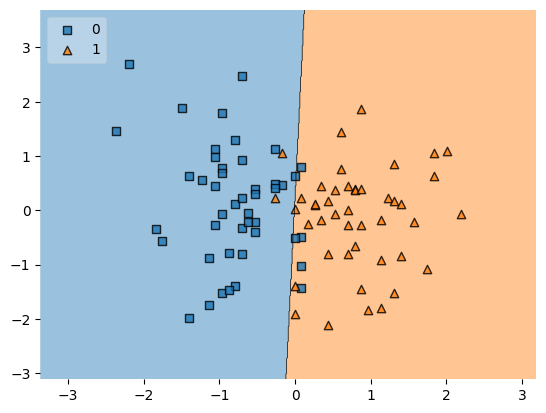

In [184]:
plot_decision_regions(X_train,y_train.values,clf=clf,legend=2)

In [185]:
import pickle  #in python everything is an object, for object it converts to file and by picking up that file we can use it in any environment

In [186]:
pickle.dump(clf,open('model.pkl','wb')) #wb means write binary